In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [104]:
df = pd.read_csv(r'C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\Data.csv')

In [105]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [107]:
class LinearRegression:
    # Hàm huấn luyện mô hình hồi quy tuyến tính.
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta_: np.ndarray = inv_cov @ (X.T @ y)
    
    # Hàm tính toán sai số trung bình bình phương căn gốc (Root Mean Square Error).
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        
        return (delta**2).mean()**0.5
    
    # Hàm dự đoán các giá trị đầu ra dựa trên dữ liệu đầu vào X.
    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        
        return y_pred

In [108]:
lr = LinearRegression()

In [109]:
X_y = df.to_numpy()

In [110]:
X_y.shape

(517, 13)

In [111]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections = [int(0.8*N)])

In [112]:
X_train, X_test = X_y_train[:, :-1], X_y_test[:, :-1]
X_train.shape, X_test.shape

((413, 12), (104, 12))

In [120]:
X_train

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 6. ,  3. ,  2. , ..., 42. ,  2.7,  0. ],
       [ 7. ,  4. ,  2. , ..., 53. ,  9.4,  0. ],
       [ 9. ,  4. ,  7. , ..., 27. ,  4.5,  0. ]], shape=(413, 12))

In [121]:
y_train

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [113]:
y_train, y_test = X_y_train[:, -1], X_y_test[:, -1]
y_train.shape, y_test.shape

((413,), (104,))

In [114]:
lr.fit(X_train, y_train)

In [115]:
y_pred = lr.predict(X_test)

In [116]:
lr.rmse(y_pred, y_test)

np.float64(79.42477263962972)

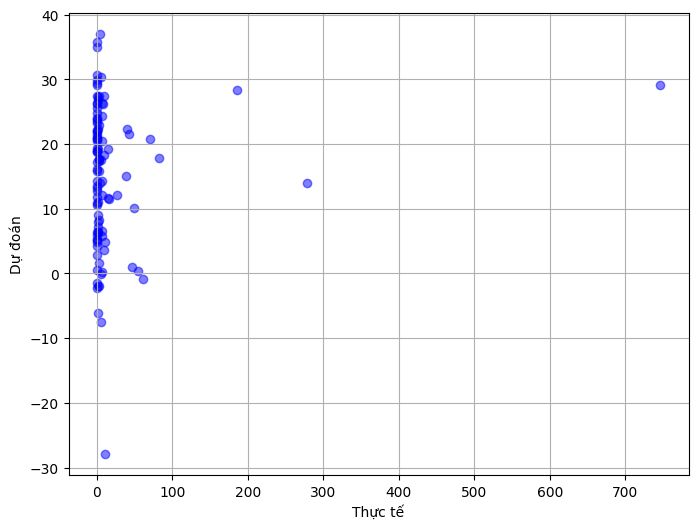

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.grid(True)
plt.show()

RMSE lớn cho thấy mô hình có sai số dự đoán rất cao. Điều này có thể xảy ra do mô hình chưa học được mối quan hệ tốt giữa các đặc trưng và biến mục tiêu hoặc có vấn đề về dữ liệu như ngoại lai, đa cộng tuyến, hoặc thiếu dữ liệu.